Setup and Data Loading

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Load datasets
air_df = pd.read_csv('air pollution dataset.csv')
churn_df = pd.read_csv('ecommerce_customer_churn_dataset.csv')

print("Datasets Loaded Successfully.")


Datasets Loaded Successfully.


Step 2: Regression Task (Air Pollution - SDG 11)


--- Regression Task: Air Pollution ---


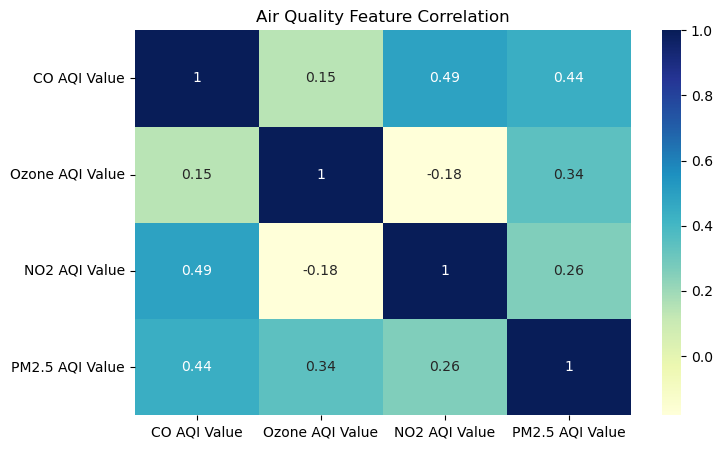

                 Model    MAE    R2
0       Neural Network  24.87  0.35
1    Linear Regression  28.34  0.28
2  Tuned Random Forest  24.83  0.37


In [24]:
# --- 1. EDA & Preprocessing ---
print("\n--- Regression Task: Air Pollution ---")
# Use numerical columns for prediction
reg_features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']
X_reg = air_df[reg_features]
y_reg = air_df['PM2.5 AQI Value']

# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(air_df[reg_features + ['PM2.5 AQI Value']].corr(), annot=True, cmap='YlGnBu')
plt.title('Air Quality Feature Correlation')
plt.show()

# Splitting Data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# --- 2. Model Implementation ---
# Model A: Neural Network (MLP)
mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_reg.fit(X_train_r, y_train_r)

# Model B: Linear Regression (Classical 1)
lr_reg = LinearRegression()
lr_reg.fit(X_train_r, y_train_r)

# Model C: Random Forest (Classical 2) + Hyperparameter Tuning
rf_reg = RandomForestRegressor(random_state=42)
param_grid_r = {'n_estimators': [50, 100], 'max_depth': [None, 10]}
grid_reg = GridSearchCV(rf_reg, param_grid_r, cv=3)
grid_reg.fit(X_train_r, y_train_r)

# --- 3. Regression Evaluation ---
def evaluate_reg(model, X, y, name):
    preds = model.predict(X)
    return {'Model': name, 'MAE': round(mean_absolute_error(y, preds), 2), 'R2': round(r2_score(y, preds), 2)}

results_r = [
    evaluate_reg(mlp_reg, X_test_r, y_test_r, "Neural Network"),
    evaluate_reg(lr_reg, X_test_r, y_test_r, "Linear Regression"),
    evaluate_reg(grid_reg.best_estimator_, X_test_r, y_test_r, "Tuned Random Forest")
]
print(pd.DataFrame(results_r))

Step 3: Classification Task (E-commerce Churn - SDG 9)


--- Classification Task: Customer Churn ---
Top 3 Selected Features: ['Login_Frequency', 'Cart_Abandonment_Rate', 'Customer_Service_Calls']
                 Model  Accuracy
0       Neural Network      0.76
1  Logistic Regression      0.74
2        Random Forest      0.70


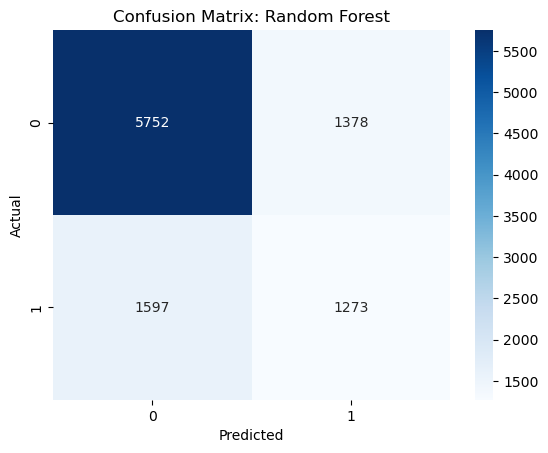

In [25]:
# --- 1. EDA & Preprocessing ---
print("\n--- Classification Task: Customer Churn ---")
# Data Cleaning: Fill missing values with median
churn_df_clean = churn_df.copy()
numeric_cols = churn_df_clean.select_dtypes(include=[np.number]).columns
churn_df_clean[numeric_cols] = churn_df_clean[numeric_cols].fillna(churn_df_clean[numeric_cols].median())

# Selecting numerical features for classification
class_features = ['Membership_Years', 'Login_Frequency', 'Cart_Abandonment_Rate', 'Average_Order_Value', 'Customer_Service_Calls']
X_class = churn_df_clean[class_features]
y_class = churn_df_clean['Churned']

# Feature Selection (RFE)
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=3)
X_selected = selector.fit_transform(X_class, y_class)
selected_cols = X_class.columns[selector.support_]
print(f"Top 3 Selected Features: {list(selected_cols)}")

# Splitting Data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_selected, y_class, test_size=0.2, random_state=42)

# --- 2. Model Implementation ---
# Model A: Neural Network (MLP)
mlp_class = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_class.fit(X_train_c, y_train_c)

# Model B: Logistic Regression (Classical 1)
log_reg = LogisticRegression()
log_reg.fit(X_train_c, y_train_c)

# Model C: Random Forest (Classical 2)
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_c, y_train_c)

# --- 3. Classification Evaluation ---
def evaluate_class(model, X, y, name):
    preds = model.predict(X)
    acc = accuracy_score(y, preds)
    return {'Model': name, 'Accuracy': round(acc, 2)}

results_c = [
    evaluate_class(mlp_class, X_test_c, y_test_c, "Neural Network"),
    evaluate_class(log_reg, X_test_c, y_test_c, "Logistic Regression"),
    evaluate_class(rf_class, X_test_c, y_test_c, "Random Forest")
]
print(pd.DataFrame(results_c))

# Confusion Matrix for the best model (Random Forest)
cm = confusion_matrix(y_test_c, rf_class.predict(X_test_c))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
